# Principal Component Analysis

Let's discuss PCA! We will walk through the cancer set with PCA.

## PCA Review

PCA is just a transformation of our data and attempts to find out what features explain the most variance in our data. For example:

<img src='PCA.png' />

## Libraries

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set since it had so many features.

In [56]:
from sklearn.datasets import load_breast_cancer

In [57]:
cancer = load_breast_cancer()

In [58]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [59]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [60]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [61]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
X = scaler.transform(df)

In [29]:
X[0:10]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [62]:
from sklearn.decomposition import PCA

In [63]:
X=df
#Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=X.shape[1])

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 4 Principal components present in reduced_X
print(np.round(reduced_X[0:4],2))

[[ 1.16014e+03 -2.93920e+02  4.85800e+01 -8.71000e+00  3.20000e+01
   1.27000e+00  9.30000e-01  1.50000e-01  7.50000e-01  5.90000e-01
  -3.10000e-01  4.00000e-02  3.00000e-02  7.00000e-02 -1.00000e-02
  -0.00000e+00  2.00000e-02  1.00000e-02 -1.00000e-02 -5.00000e-02
   2.00000e-02  0.00000e+00  0.00000e+00  1.00000e-02  1.00000e-02
   0.00000e+00 -0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 1.26912e+03  1.56300e+01 -3.53900e+01  1.78600e+01 -4.33000e+00
  -2.30000e-01 -5.00000e-02  2.00000e-01 -4.90000e-01 -8.00000e-02
   8.00000e-02  3.00000e-02  5.00000e-02 -1.00000e-02  2.00000e-02
  -3.00000e-02  1.00000e-02 -1.00000e-02  2.00000e-02  2.00000e-02
   1.00000e-02  2.00000e-02  0.00000e+00  1.00000e-02 -1.00000e-02
   0.00000e+00 -0.00000e+00 -0.00000e+00  0.00000e+00 -0.00000e+00]
 [ 9.95790e+02  3.91600e+01 -1.71000e+00  4.20000e+00 -4.70000e-01
  -2.65000e+00 -7.80000e-01 -2.70000e-01 -1.70000e-01 -1.90000e-01
   2.80000e-01 -2.00000e-02  8.00000e-02  2.00000e-02 -3.000

In [65]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 98% and 2% variance of data respectively

[0.98 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [66]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 98.2   99.82  99.98  99.99 100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.  ]


### Finding optimal number of Principal components

Text(0, 0.5, '% Variance explained')

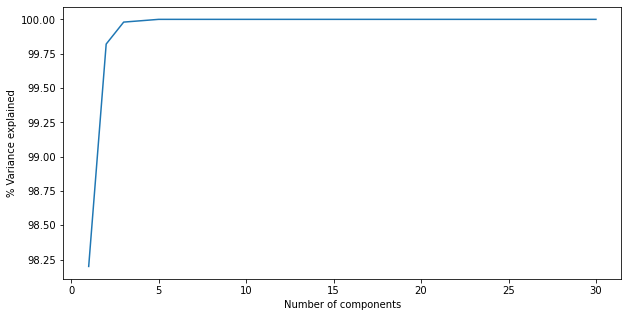

In [70]:
# By Looking at below graph we can see that 3 components are explaining maximum Variance in the dataset
# The elbow occurs at 3rd principal component
plt.figure(figsize=(10,5))
plt.plot( range(1,31), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

## Creating final number of Principal Components

In [71]:
# Choosing 3-principal components based on above graph
pca = PCA(n_components=3)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# Four Columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[1160.14 -293.92   48.58]
 [1269.12   15.63  -35.39]
 [ 995.79   39.16   -1.71]
 [-407.18  -67.38    8.67]
 [ 930.34  189.34    1.37]
 [-211.59  -79.88   -1.48]
 [ 821.21  -47.15  -32.25]
 [ -25.09  -74.19   11.79]
 [-191.29  -42.13   -6.29]
 [-238.29  -65.39   -3.63]]


Text(0, 0.5, 'Second Principal Component')

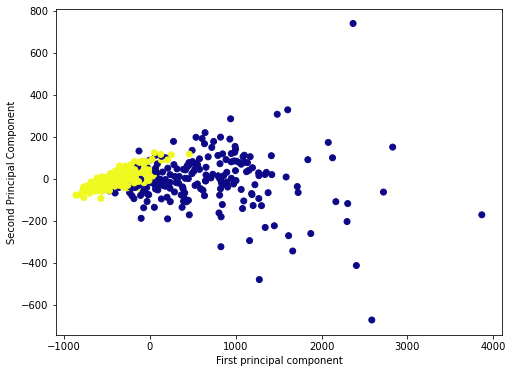

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_X[:,0],reduced_X[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [74]:
# Printing the factor loadings
# The Coefficient which is multiplied with each column to get 10 Principal Components
loadings = pca.components_
print(loadings)

[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.53071662e-05]
 [-1.2

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [75]:
Reduceddf=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3'])
Reduceddf['Target']=cancer['target']
Reduceddf.head()

,PC1,PC2,PC3,Target
0,1160.142574,-293.917544,48.578398,0
1,1269.122443,15.630182,-35.394534,0
2,995.793889,39.156743,-1.709753,0
3,-407.180803,-67.380320,8.672848,0
4,930.341180,189.340742,1.374801,0


In [94]:
import plotly.express as px
fig= px.scatter_3d(Reduceddf,x='PC1',y='PC2',z='PC3',color=cancer['target'])
#fig.xlabel('First principal component')
#fig.ylabel('Second Principal Component')
fig.show()

In [76]:
df_comp = pd.DataFrame(loadings,columns=cancer['feature_names'])

<AxesSubplot:>

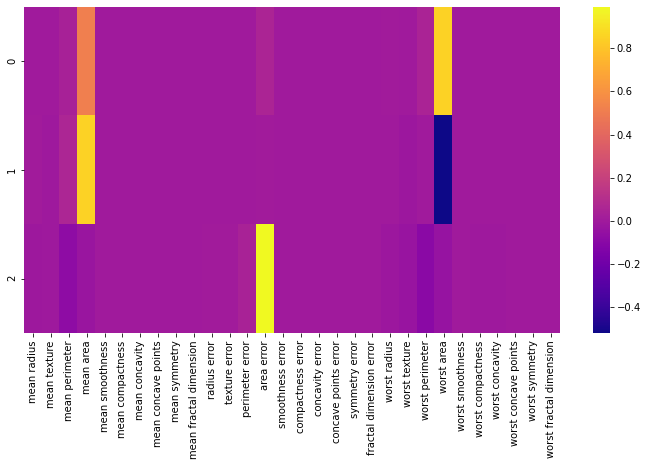

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion
**Correlation between any two pairs of PCA is zero**.


### Now any machine learning classification algorithm can be used on above data

### Inverse transform
We can get the original data from the principal components using inverse transform


In [83]:
OriginalData=pca_fit.inverse_transform(reduced_X)

In [90]:
# Printing sample rows
# Suppressing scientific notation
np.set_printoptions(suppress=True)
OriginalData[0:5]

array([[  16.69883435,   22.37622323,  110.73822598, 1002.7604916 ,
           0.10916112,    0.15709022,    0.17469716,    0.09247967,
           0.20365646,    0.066954  ,    1.07945244,    1.34176469,
           7.35008341,  150.88544469,    0.00777768,    0.03433936,
           0.04382566,    0.01517553,    0.02105563,    0.00479185,
          23.98067172,   31.58761516,  160.20935302, 2019.94950353,
           0.16035962,    0.4098787 ,    0.47861977,    0.1928295 ,
           0.33999608,    0.10008486],
       [  21.16436127,   22.25725659,  140.0026626 , 1325.10664397,
           0.0989341 ,    0.15212987,    0.18455105,    0.10900739,
           0.18474929,    0.05742629,    0.58796138,    0.91903907,
           4.16479755,   76.12978591,    0.00450408,    0.0281633 ,
           0.03626088,    0.01440919,    0.01510946,    0.00283033,
          25.89148411,   30.48003671,  173.29350193, 1955.22390057,
           0.14080635,    0.40586457,    0.51380026,    0.21942785,
         